# Tunnel Heat Transfer Simulation in Mining Engineering

## Problem Statement

In underground mining, understanding how the temperature of the surrounding rock mass evolves around a mine tunnel is crucial for safe, comfortable, and efficient mine operations. When cold air (from ventilation) is pumped into a newly excavated tunnel, it gradually cools the hot rock near the tunnel wall. The temperature decreases with distance from the wall—and this process happens over hours, days, or even weeks.

This project simulates that process: **Solving the transient (time-dependent) radial heat conduction in the rock surrounding a mine tunnel, and visualizing how the temperature profile changes both in space and time.**

---

## About Mine Ventilation and Its Importance

**Mine ventilation** supplies fresh air to remove heat, hazardous gases, and dust from underground workings. It ensures a safe environment, prevents heat stress for workers, and is essential for productive operations, especially as mining goes deeper and temperatures rise.

### Why Mine Heat Transfer Matters

- **Safety**: Excessive heat buildup can be fatal and increases risks of equipment failure and rock instability.
- **Comfort and Efficiency**: Cooler air improves worker comfort and reduces fatigue.
- **Energy Planning**: Understanding heat flow helps optimize ventilation energy cost and cooling system design.

Proper simulation allows mining engineers to optimize tunnel layouts and develop efficient ventilation strategies tailored to the unique heat transfer characteristics of the rock mass.

---

## Why This Subject and Visualization are Helpful

- You can **see how quickly cooling penetrates the rock**—crucial for planning advance ventilation.
- The graphs reveal **how much rock remains hot nearby**, which can inform timing for safe occupancy or additional support installation.
- Enables you to assess **the effect of increased ventilation velocity** or improved airflow on cooling speed and depth, supporting operational decisions.

---

## Mathematical Formulation

The simulation is based on the **transient heat conduction equation in a cylinder (radial direction):**

$$
\frac{\partial T}{\partial t} = \alpha \left(
\frac{\partial^2 T}{\partial r^2} + \frac{1}{r} \frac{\partial T}{\partial r}
\right)
$$

where:
- \( T \) is temperature,
- \( r \) is the radial distance from the tunnel center,
- \( t \) is time,
- \( \alpha \) is thermal diffusivity (\( k/\rho c_p \)), where \( k \) is thermal conductivity, \( \rho \) is density, and \( c_p \) is specific heat.

---

## Improvements You Can Make

- Include **variable rock properties** (thermal conductivity and specific heat may depend on temperature).
- Simulate **multiple rock zones/layers**.
- Add **time-varying air temperature or airflow**.
- Visualize **transient response** for changing tunnel airflow or after sudden ventilation changes.
- Couple results with **air quality prediction** (e.g., gas emission rates, humidity).

---

## Challenges and Considerations

- **Numerical Stability:** Choose time and space steps carefully to avoid unstable solutions.
- **Parameter Uncertainty:** Real-rock properties and conditions vary, which affects model reliability.
- **Geometric Complexity:** Real tunnels may not be perfect circles, requiring more complex 2D or 3D codes.
- **Boundary Realism:** Actual air-rock contact may offer resistance; real boundaries might not be fixed.

---

## Complete, Detailed Code Explanations

### **A. Basic Code (Fixed Wall Boundary):**



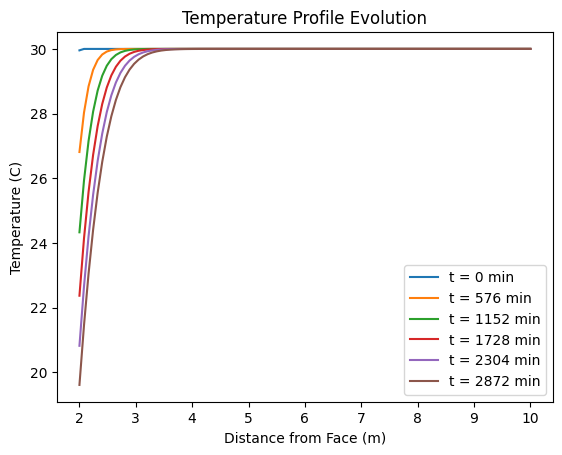

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rho = 2500         # Density of rock [kg/m^3]
cp = 880           # Specific heat capacity [J/kg/K]
k = 2.5            # Thermal conductivity [W/m/K]
h = 15             # Heat transfer coefficient [W/m^2/K]
T_air = 15.0       # Air temperature at tunnel wall [C]
T0 = 30.0          # Initial rock temperature [C]
T_outer = 30.0     # Outer rock layer temperature [C]
r1 = 2.0           # Inner radius of tunnel [m]
r2 = 10.0          # Outer radius of tunnel rock [m]
t_sim_min = 2880   # Simulation time in minutes
t_sim_sec = t_sim_min * 60  # Convert to seconds
nr = 100           # Number of radial mesh points
nt = 400           # Number of time steps
dr = (r2 - r1) / (nr - 1)
dt = t_sim_sec / nt
alpha = k / (rho * cp)  # Thermal diffusivity

r = np.linspace(r1, r2, nr)
T = np.linspace(T0, T_outer, nr)

T_store = []
time_store = []

for step in range(nt):
    T_new = T.copy()
    wall_flux = h * (T_new[0] - T_air) / (rho * cp)
    T_new[0] -= wall_flux * dt

    for i in range(1, nr-1):
        d2T_dr2 = (T[i+1] - 2*T[i] + T[i-1]) / dr**2
        dT_dr = (T[i+1] - T[i-1]) / (2*dr)
        radial_term = (1/r[i]) * dT_dr
        T_new[i] = T[i] + alpha * dt * (d2T_dr2 + radial_term)

    T_new[-1] = T_outer
    T = T_new

    if (step % (nt // 5) == 0) or (step == nt - 1):
        T_store.append(T.copy())
        time_store.append(step * dt / 60)

for idx, T_profile in enumerate(T_store):
    plt.plot(r, T_profile, label=f't = {int(time_store[idx])} min')
plt.xlabel('Distance from Face (m)')
plt.ylabel('Temperature (C)')
plt.title('Temperature Profile Evolution')
plt.legend()
plt.show()

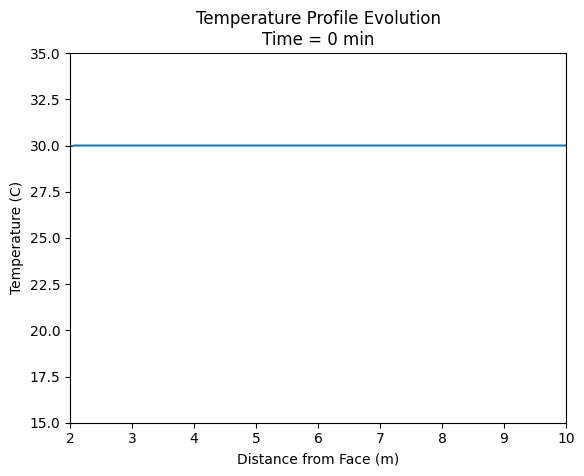

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

rho = 2500
cp = 880
k = 2.5
h = 15
T_air = 15.0
T0 = 30.0
T_outer = 30.0
r1 = 2.0
r2 = 10.0
t_sim_min = 2880
t_sim_sec = t_sim_min * 60
nr = 100
nt = 400
dr = (r2 - r1) / (nr - 1)
dt = t_sim_sec / nt
alpha = k / (rho * cp)

r = np.linspace(r1, r2, nr)
T = np.linspace(T0, T_outer, nr)

T_store = []
time_store = []

for step in range(nt):
    T_new = T.copy()
    wall_flux = h * (T_new[0] - T_air) / (rho * cp)
    T_new[0] -= wall_flux * dt

    for i in range(1, nr-1):
        d2T_dr2 = (T[i+1] - 2*T[i] + T[i-1]) / dr**2
        dT_dr = (T[i+1] - T[i-1]) / (2*dr)
        radial_term = (1/r[i]) * dT_dr
        T_new[i] = T[i] + alpha * dt * (d2T_dr2 + radial_term)

    T_new[-1] = T_outer
    T = T_new

    T_store.append(T.copy())
    time_store.append(step * dt / 60)

# Animation using FuncAnimation
fig, ax = plt.subplots()
line, = ax.plot(r, T_store[0])
ax.set_xlim(r[0], r[-1])
ax.set_ylim(T_air, T0+5)
ax.set_xlabel('Distance from Face (m)')
ax.set_ylabel('Temperature (C)')
ax.set_title('Animated Temperature Profile Evolution')

def update(frame):
    line.set_ydata(T_store[frame])
    ax.set_title(f'Temperature Profile Evolution\nTime = {int(time_store[frame])} min')
    return line,

ani = FuncAnimation(fig, update, frames=len(T_store), interval=50, blit=True)
plt.show()

ani.save('conduction_temp_animation.gif', writer='imagemagick')

### **B. Advanced Code (Velocity-Dependent Wall - Nusselt Number):**

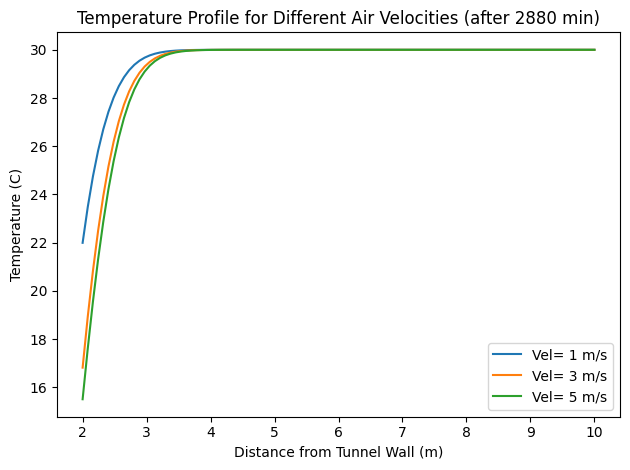

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Nusselt number formula
def h_nusselt_sheet(T_wall, air_vel, D=4):
    kv = 1.5e-5  # Kinematic viscosity of air (m^2/s)
    Re = air_vel * D / kv
    term1 = 0.35 * Re
    term2 = 1.592 * ((15.217 * Re**0.2 - 1) / (Re ** 0.125))
    Nu = term1 / (1 + term2)
    k_air = 0.026  # Air thermal conductivity (W/m/K)
    h = Nu * k_air / D
    return h

rho = 2500
cp = 880
k = 2.5
T_air = 15.0
T_outer = 30.0
T0 = 30.0
r1, r2 = 2.0, 10.0
nr, nt = 100, 400
dr = (r2 - r1) / (nr - 1)
dt = (2880*60) / nt
alpha = k / (rho * cp)
r = np.linspace(r1, r2, nr)
distance = r

air_velocities = [1, 3, 5]
final_profiles = []

for v in air_velocities:
    T = np.linspace(T0, T_outer, nr)
    for step in range(nt):
        T_new = T.copy()
        h = h_nusselt_sheet(T_new[0], v)
        wall_flux = h * (T_new[0] - T_air) / (rho * cp)
        T_new[0] -= wall_flux * dt
        for i in range(1, nr-1):
            d2T_dr2 = (T[i+1] - 2*T[i] + T[i-1]) / dr**2
            dT_dr = (T[i+1] - T[i-1]) / (2*dr)
            radial_term = (1/r[i]) * dT_dr
            T_new[i] = T[i] + alpha * dt * (d2T_dr2 + radial_term)
        T_new[-1] = T_outer
        T = T_new
    final_profiles.append(T)

#plt.figure(figsize=(8,5))
for idx, v in enumerate(air_velocities):
    plt.plot(distance, final_profiles[idx], label=f'Vel= {v} m/s')
plt.xlabel('Distance from Tunnel Wall (m)')
plt.ylabel('Temperature (C)')
plt.title('Temperature Profile for Different Air Velocities (after 2880 min)')
plt.legend()
plt.tight_layout()
plt.show()

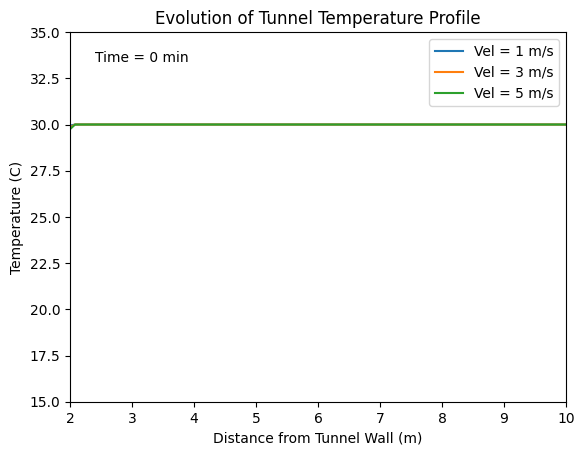

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def h_nusselt_sheet(T_wall, air_vel, D=4):
    kv = 1.5e-5  # Kinematic viscosity of air (m^2/s)
    Re = air_vel * D / kv
    term1 = 0.35 * Re
    term2 = 1.592 * ((15.217 * Re**0.2 - 1) / (Re ** 0.125))
    Nu = term1 / (1 + term2)
    k_air = 0.026  # Air thermal conductivity (W/m/K)
    h = Nu * k_air / D
    return h

rho = 2500
cp = 880
k = 2.5
T_air = 15.0
T_outer = 30.0
T0 = 30.0
r1, r2 = 2.0, 10.0
nr, nt = 100, 200
dr = (r2 - r1) / (nr - 1)
dt = (2880*60) / nt
alpha = k / (rho * cp)
r = np.linspace(r1, r2, nr)
distance = r

air_velocities = [1, 3, 5]
profile_history = [[] for _ in air_velocities]

for idx_v, v in enumerate(air_velocities):
    T = np.linspace(T0, T_outer, nr)
    for step in range(nt):
        T_new = T.copy()
        h = h_nusselt_sheet(T_new[0], v)
        wall_flux = h * (T_new[0] - T_air) / (rho * cp)
        T_new[0] -= wall_flux * dt
        for i in range(1, nr-1):
            d2T_dr2 = (T[i+1] - 2*T[i] + T[i-1]) / dr**2
            dT_dr = (T[i+1] - T[i-1]) / (2*dr)
            radial_term = (1/r[i]) * dT_dr
            T_new[i] = T[i] + alpha * dt * (d2T_dr2 + radial_term)
        T_new[-1] = T_outer
        T = T_new
        if (step % max(1, nt // 100) == 0 or step == nt-1):
            profile_history[idx_v].append(T.copy())

n_frames = len(profile_history[0])

fig, ax = plt.subplots()
lines = [ax.plot(distance, profile_history[i][0], label=f'Vel = {v} m/s')[0] for i, v in enumerate(air_velocities)]
ax.set_xlabel('Distance from Tunnel Wall (m)')
ax.set_ylabel('Temperature (C)')
ax.set_title('Evolution of Tunnel Temperature Profile')
ax.set_xlim(distance[0], distance[-1])
ax.set_ylim(T_air, T0+5)
ax.legend()
time_template = ax.text(0.05, 0.95, '', transform=ax.transAxes, va='top')

def update(frame):
    for i, line in enumerate(lines):
        line.set_ydata(profile_history[i][frame])
    time_template.set_text(f'Time = {int(frame*dt*(nt//n_frames)/60)} min')
    return lines + [time_template]

ani = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=True)
plt.show()

ani.save('convection_tunnel_temp_animation.gif', writer='pillow', fps=10)

---

## Key Learnings

- **Heat transfer** in mining tunnels is complex, but physical principles can be simulated accurately with Python.
- **Numerical modelling** (finite difference method) lets us predict the rate and depth of tunnel rock cooling under different ventilation conditions.
- **Ventilation speed** (tunnel airflow velocity) is a powerful controlling factor for mine cooling rate: higher velocity dramatically accelerates wall and near-field cooling.
- The choice of **physical boundary conditions** (Dirichlet for perfect air-rock contact, convective for realistic airflow) has a large impact on simulation accuracy and project outcomes.
- Careful **code structuring**, step-by-step debugging, and visualizing time-dependent profiles are crucial for both understanding and communicating results.

---